# Get current stock price data

In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [27]:
# https://vegibit.com/python-yfinance-tutorial/
tsla = yf.Ticker("TSLA") #ticker for TESLA stocks

In [4]:
#msft.history(period='6mo')

In [136]:
# https://stackoverflow.com/questions/61976027/scraping-yahoo-finance-at-regular-intervals

#dataset_train = yf.download("TSLA", start="2022-01-27", end="2022-12-27") # poner un dia mas del actual
## Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]
dataset_train = yf.download("TSLA", start="2022-12-01", end="2023-07-01", interval="1h") #period="6mo"
len(dataset_train)

[*********************100%***********************]  1 of 1 completed


1015

In [137]:
#dataset_train.head()
dataset_train

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-01 09:30:00-05:00,197.080002,198.919998,191.800003,192.550903,192.550903,29119215
2022-12-01 10:30:00-05:00,192.556305,196.699997,191.800003,194.715500,194.715500,15565256
2022-12-01 11:30:00-05:00,194.690002,196.050003,193.750000,194.660004,194.660004,8154285
2022-12-01 12:30:00-05:00,194.639999,196.324600,194.050003,194.869995,194.869995,6870148
2022-12-01 13:30:00-05:00,194.860001,195.399994,194.289993,194.710007,194.710007,5642394
...,...,...,...,...,...,...
2023-06-30 11:30:00-04:00,263.850006,263.875000,261.600006,263.695007,263.695007,13867972
2023-06-30 12:30:00-04:00,263.700012,264.089996,263.029999,263.385010,263.385010,9951960
2023-06-30 13:30:00-04:00,263.380005,263.929993,262.559998,262.809998,262.809998,9358361


In [138]:
training_set = dataset_train.iloc[:, 0:1].values
training_set.shape

(1015, 1)

In [139]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

In [140]:
training_set_scaled = sc.fit_transform(training_set)

In [141]:
X_train = []
y_train = []
for i in range(60, 1008):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape, y_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape, y_train.shape)


(948, 60) (948,)
(948, 60, 1) (948,)


In [142]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [143]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [144]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_16 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_17 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_17 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_18 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_18 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_19 (LSTM)              (None, 50)               

# Training

In [145]:
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100


30/30 [==============================] - 9s 92ms/step - loss: 0.0356
Epoch 2/100
30/30 [==============================] - 3s 95ms/step - loss: 0.0058
Epoch 3/100
30/30 [==============================] - 3s 91ms/step - loss: 0.0049
Epoch 4/100
30/30 [==============================] - 3s 92ms/step - loss: 0.0056
Epoch 5/100
30/30 [==============================] - 3s 91ms/step - loss: 0.0050
Epoch 6/100
30/30 [==============================] - 3s 93ms/step - loss: 0.0048
Epoch 7/100
30/30 [==============================] - 3s 97ms/step - loss: 0.0044
Epoch 8/100
30/30 [==============================] - 3s 90ms/step - loss: 0.0042
Epoch 9/100
30/30 [==============================] - 3s 95ms/step - loss: 0.0044
Epoch 10/100
30/30 [==============================] - 3s 90ms/step - loss: 0.0044
Epoch 11/100
30/30 [==============================] - 3s 90ms/step - loss: 0.0045
Epoch 12/100
30/30 [==============================] - 3s 92ms/step - loss: 0.0039
Epoch 13/100
30/30 [=================

## Predictions on Test set
I take the next month for making predictions

In [146]:
# dataset_test = yf.download("MSFT", start="2022-12-28", end="2023-01-27") # poner un dia mas del actual
dataset_test = yf.download("TSLA", start="2023-07-01", end="2023-07-19", interval="60m") # va hasta el dia end -1
len(dataset_test)

[*********************100%***********************]  1 of 1 completed


73

In [153]:
dataset_train.tail()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-06-30 11:30:00-04:00,263.850006,263.875000,261.600006,263.695007,263.695007,13867972
2023-06-30 12:30:00-04:00,263.700012,264.089996,263.029999,263.385010,263.385010,9951960
2023-06-30 13:30:00-04:00,263.380005,263.929993,262.559998,262.809998,262.809998,9358361
2023-06-30 14:30:00-04:00,262.820007,263.160004,262.010010,262.998993,262.998993,11522906
2023-06-30 15:30:00-04:00,262.980011,263.098389,261.630005,261.679108,261.679108,9086213


In [163]:
dataset_test.tail()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-07-18 11:30:00,288.905090,288.980011,287.500000,288.459991,288.459991,10907592
2023-07-18 12:30:00,288.450012,291.399994,288.350006,290.660004,290.660004,13049077
2023-07-18 13:30:00,290.679993,292.260010,290.329987,291.899994,291.899994,10255032
2023-07-18 14:30:00,291.894989,293.769989,291.592987,292.799988,292.799988,13878426
2023-07-18 15:30:00,292.799988,295.260010,292.750000,293.369995,293.369995,12363523


In [149]:
real_stock_price = dataset_test.iloc[:, 0:1].values

In [150]:
dataset_test.shape, dataset_train.shape

((73, 6), (1015, 6))

In [154]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
dataset_total.shape

(1088,)

In [155]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs.shape

(133,)

In [157]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs.shape

(133, 1)

In [158]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(73, 60, 1)

In [161]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

3/3 [==============================] - 1s 24ms/step


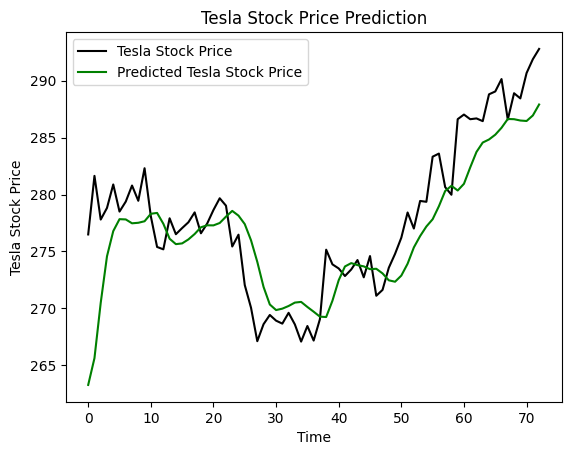

<Figure size 640x480 with 0 Axes>

In [166]:
plt.plot(real_stock_price, color = 'black', label = 'Tesla Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()
plt.savefig("TeslaStocks.pdf", format="pdf", bbox_inches="tight")

In [165]:
#real_stock_price